# Post hoc Analysis of IMAGEN:

The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>
<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd 
import numpy as np
from glob import glob
from os.path import join 
import os 
from scikits.bootstrap import ci
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from plotResults import *

# 2. Sensitivity Analysis

### 2.1.1 probabilitiy distributions

In [2]:
df = pd.read_csv(sorted(glob("../MLpipelines/results/newlbls-fu3-espad-fu3-19a-binge-*/*/run.csv"))[-1])

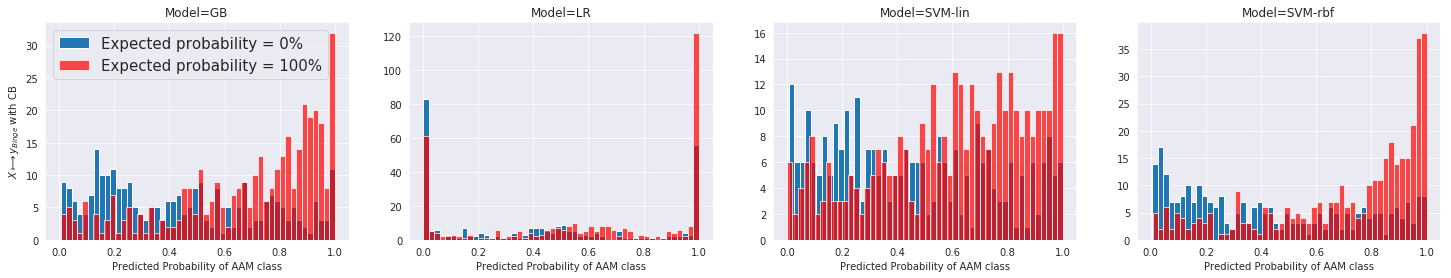

In [3]:
grp_order = ["io", "technique", "model"]
groups = df.groupby(grp_order)   
n_models = len(df["model"].unique())
n_rows = round(len(groups)/n_models)
fig, axes = plt.subplots(n_rows, n_models, 
                         sharex=True, sharey=False,
                         figsize=(25, n_models*n_rows))
axes = np.ravel(axes)
        
for i, (g, dfi) in enumerate(groups):
    ids_all = np.array([id_lists for ids in dfi["test_ids"] for id_lists in eval(ids)])
    assert ids_all.shape[0] == np.unique(ids_all).shape[0]
    probs_all = np.array([prob_lists for probs in dfi["test_probs"] for prob_lists in eval(probs)])
    y_all = np.array([y_lists for y in dfi["test_lbls"] for y_lists in eval(y)])
    assert probs_all.shape[0] == y_all.shape[0]

    prediction=probs_all[:,1]
    ax = axes[i]
    ax.hist(prediction[y_all==0], bins=50, label='Expected probability = 0%')
    ax.hist(prediction[y_all==1], bins=50, label='Expected probability = 100%', alpha=0.7, color='r')
    ax.set_xlabel('Predicted Probability of AAM class')
    if i%n_models == 0:
        ax.set_ylabel("{} with {}".format(remap_io(dfi.iloc[0]), g[1].upper()))
    if i == 0:
        ax.legend(fontsize=15)
    ax.set_title("Model={}".format(g[-1]))
    
plt.show()

## 2.2. Performance across sites

### 2.2.1 main experiment

In [4]:
from imagen_posthocloader import *
posthoc = IMAGEN_posthoc()

In [5]:
RUN = posthoc.get_RUN('all_RUN.csv')
DF = RUN.groupby('Session').get_group('FU3')

In [6]:
DF

,i,o,io,technique,Session,Trial,path,n_samples,n_samples_cc,i_is_conf,...,TP prob,TN prob,FP prob,FN prob,T prob,F prob,Prob,Predict TF,Model PN,Label PN
10728,X,Binge,X-Binge,cb,FU3,0,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,959,False,...,NaN,NaN,0.9936,NaN,NaN,0.9936,FP,FP & FN,TP & FP,TN & FP
10729,X,Binge,X-Binge,cb,FU3,0,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,959,False,...,0.9705,NaN,NaN,NaN,0.9705,NaN,TP,TP & TN,TP & FP,TP & FN
10730,X,Binge,X-Binge,cb,FU3,0,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,959,False,...,NaN,NaN,NaN,0.0466,NaN,0.0466,FN,FP & FN,TN & FN,TP & FN
10731,X,Binge,X-Binge,cb,FU3,0,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,959,False,...,NaN,NaN,NaN,0.0775,NaN,0.0775,FN,FP & FN,TN & FN,TP & FN
10732,X,Binge,X-Binge,cb,FU3,0,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,959,False,...,NaN,NaN,0.9999,NaN,NaN,0.9999,FP,FP & FN,TP & FP,TN & FP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16179,X,Binge,X-Binge,cb,FU3,6,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,946,False,...,NaN,0.2119,NaN,NaN,0.2119,NaN,TN,TP & TN,TN & FN,TN & FP
16180,X,Binge,X-Binge,cb,FU3,6,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,946,False,...,NaN,0.1275,NaN,NaN,0.1275,NaN,TN,TP & TN,TN & FN,TN & FP
16181,X,Binge,X-Binge,cb,FU3,6,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,946,False,...,0.5652,NaN,NaN,NaN,0.5652,NaN,TP,TP & TN,TP & FP,TP & FN
16182,X,Binge,X-Binge,cb,FU3,6,results/newlbls-clean-fu3-espad-fu3-19a-binge-...,650,946,False,...,NaN,0.0976,NaN,NaN,0.0976,NaN,TN,TP & TN,TN & FN,TN & FP


In [7]:
Prob = DF.groupby(['Model']).count()
Prob['ACC'] = (Prob['T prob']/(Prob['T prob']+Prob['F prob']))*100 # (TP+TN)/(TP+FP+FN+TN)
Prob['Recall'] = Prob['TP prob']/(Prob['TP prob']+Prob['FN prob'])*100 # TP/(TP+FN)
Prob['Precision'] = Prob['TP prob']/(Prob['TP prob']+Prob['FP prob'])*100 # TP/(TP+FP) 
Prob['f1 Score'] = 2*(Prob['Precision']*Prob['Recall'])/(Prob['Precision']+Prob['Recall'])

Prob[Prob.columns[37:]]

,ACC,Recall,Precision,f1 Score
Model,,,,
GB,73.533724,79.129321,75.735294,77.395116
LR,66.495601,67.605634,72.131148,69.795109
SVM-lin,67.668622,70.806658,72.193211,71.493213
SVM-rbf,75.293255,80.921895,77.073171,78.950656


In [ ]:
# Prob = DF.groupby(['Site','Model']).count()
# Prob['ACC'] = (Prob['T']/(Prob['T']+Prob['F']))*100 # (TP+TN)/(TP+FP+FN+TN)
# Prob['Recall'] = Prob['TP']/(Prob['TP']+Prob['FN'])*100 # TP/(TP+FN)
# Prob['Precision'] = Prob['TP']/(Prob['TP']+Prob['FP'])*100 # TP/(TP+FP) 
# Prob['f1 Score'] = 2*(Prob['Precision']*Prob['Recall'])/(Prob['Precision']+Prob['Recall'])

# Prob[Prob.columns[9:]]

In [8]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

models = DF.groupby(['Model']) 

for i, (g, dfi) in enumerate(models):
    y_true = dfi['true_label'].to_list()
    y_pred = np.round(dfi['prediction'].to_list())
    # classification report
    print(f"Classification report: {g[0]} {dfi['Model'].iloc[0]} \n"
          f"{classification_report(y_true, y_pred, target_names=['HC', 'AAM'])}")
#     # Confusion Matrix
#     print(f'confusion matrix \n {confusion_matrix(y_true, y_pred)}')

Classification report: G GB 
              precision    recall  f1-score   support

          HC       0.70      0.66      0.68       583
         AAM       0.76      0.79      0.77       781

    accuracy                           0.73      1364
   macro avg       0.73      0.73      0.73      1364
weighted avg       0.73      0.73      0.73      1364

Classification report: L LR 
              precision    recall  f1-score   support

          HC       0.60      0.65      0.62       583
         AAM       0.72      0.68      0.70       781

    accuracy                           0.66      1364
   macro avg       0.66      0.66      0.66      1364
weighted avg       0.67      0.66      0.67      1364

Classification report: S SVM-lin 
              precision    recall  f1-score   support

          HC       0.61      0.64      0.63       583
         AAM       0.72      0.70      0.71       781

    accuracy                           0.67      1364
   macro avg       0.67      0.67   

In [ ]:
# models = DF.groupby(['Site','Model']) 

# for i, (g, dfi) in enumerate(models):
#     y_true = dfi['Labels'].to_list()
#     y_pred = np.round(dfi['Probability'].to_list())
#     # classification report
#     print(f"Classification report: {g[0]} {dfi['Model'].iloc[0]} \n"
#           f"{classification_report(y_true, y_pred, target_names=['HC', 'AAM'])}")
# #     # Confusion Matrix
# #     print(f'confusion matrix \n {confusion_matrix(y_true, y_pred)}')

In [ ]:
# Prob = DF.groupby('Site').count()
# Prob['ACC'] = Prob['T']/Prob['Probability']*100
# Prob